## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

### Gaussian Mixture Models - Demo 4

* Utilização do algoritmo GMM com diferentes parâmetros.
* Base de dados de descrição de vagas do Google - https://www.kaggle.com/niyamatalmass/google-job-skills

In [1]:
import time
import gensim
import numpy as np
import pandas as pd
import seaborn as sns

from nltk.corpus import stopwords

from sklearn.mixture import GaussianMixture
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 500

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

### Carregando a base de dados

In [6]:
df = pd.read_csv('../datasets/jobposts/job_skills.csv')
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical programs designed to support the work of Cloud Customer Engineers and Solutions Architects.\nMeasure and report on key metrics tied to those programs to identify any need to change course, cancel, or scale the programs from a regional to global platform.\nCommunicate status and identify any obstacles and paths for resolution to stakeholders, including those in senior roles, in a transparent, regular, professional and timely manner.\nEstablish expecta...","BA/BS degree or equivalent practical experience.\n3 years of experience in program and/or project management in cloud computing, enterprise software and/or marketing technologies.","Experience in the business technology market as a program manager in SaaS, cloud computing, and/or emerging technologies.\nSignificant cross-functional experience across engineering, sales, and marketing teams in cloud computing or related technical fields.\nProven successful program outcomes from idea to launch in multiple contexts throughout your career.\nAbility to manage the expectations, demands and priorities of multiple internal stakeholders based on overarching vision and success for..."
1,Google,"Supplier Development Engineer (SDE), Cable/Connector",Manufacturing & Supply Chain,"Shanghai, China","Drive cross-functional activities in the supply chain for overall Technical Operational readiness in all NPI phases leading into mass production.\nCollaborate with suppliers and Engineering teams in assessing process technologies based on project requirements, and propose and develop the manufacturing blueprint including process flow, equipment/fixture designs, implementation schedules and validation plans for engineering builds and mass production.\nDrive project technical and operational i...","BS degree in an Engineering discipline or equivalent practical experience.\n7 years of experience in Cable/Connector Design or Manufacturing in an NPI role.\nExperience working with Interconnect Engineering and Product Design (PD)/Mechanical Engineer in developing, manufacturing and testing.\nAbility to speak and write in English and Mandarin fluently and idiomatically.","BSEE, BSME or BSIE degree.\nExperience of using Statistics tools for Data analysis, e.g. distribution histogram/pareto chart, process control chart, Design of Experiment (DOE), Correlation Analysis, etc.\nDemonstrated knowledge in PCBA manufacturing process and quality control.\nFamilar with cable/connector related components' manufacturing: moldling, stamping, die-casting, LIM, MIM process and materials.\nSelf starter with innovation, integrity and attention to detail.\nAbility to travel up..."
2,Google,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"New York, NY, United States","Collect and analyze data to draw insight and identify strategic solutions.\nBuild consensus by facilitating broad collaboration with clear communication and documentation.\nWork with cross-functional stakeholders to gather requirements, manage implementation, and drive delivery of projects.","Bachelor’s degree in Business, Economics, Statistics, Operations Research or related analytical field, or equivalent practical experience.\n2 years of work experience in business analysis.\n1 year of experience with statistical modeling, forecasting or machine learning. Experience with R, SAS or Python.\n1 year of experience developing and manipulating large datasets.",Experience partnering or consulting cross-functionally with senior stakeholders.\nProficiency in a database query language (e.g. SQL).\nAbility to manage multiple projects in an ambiguous environment.\nStrong presentation and communication skills with the ability to communicate statistical concepts and explain recommendations to non-experts.
3,Google,"Develop

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical programs designed to support the work of Cloud Customer Engineers and Solutions Architects.\nMeasure and report on key metrics tied to those programs to identify any need to change course, cancel, or scale the programs from a regional to global platform.\nCommunicate status and identify any obstacles and paths for resolution to stakeholders, including those in senior roles, in a transparent, regular, professional and timely manner.\nEstablish expecta...","BA/BS degree or equivalent practical experience.\n3 years of experience in program and/or project management in cloud computing, enterprise software and/or marketing technologies.","Experience in the business technology market as a program manager in SaaS, cloud computing, and/or emerging technologies.\nSignificant cross-functional experience across engineering, sales, and marketing teams in cloud computing or related technical fields.\nProven successful program outcomes from idea to launch in multiple contexts throughout your career.\nAbility to manage the expectations, demands and priorities of multiple internal stakeholders based on overarching vision and success for..."
1,Google,"Supplier Development Engineer (SDE), Cable/Connector",Manufacturing & Supply Chain,"Shanghai, China","Drive cross-functional activities in the supply chain for overall Technical Operational readiness in all NPI phases leading into mass production.\nCollaborate with suppliers and Engineering teams in assessing process technologies based on project requirements, and propose and develop the manufacturing blueprint including process flow, equipment/fixture designs, implementation schedules and validation plans for engineering builds and mass production.\nDrive project technical and operational i...","BS degree in an Engineering discipline or equivalent practical experience.\n7 years of experience in Cable/Connector Design or Manufacturing in an NPI role.\nExperience working with Interconnect Engineering and Product Design (PD)/Mechanical Engineer in developing, manufacturing and testing.\nAbility to speak and write in English and Mandarin fluently and idiomatically.","BSEE, BSME or BSIE degree.\nExperience of using Statistics tools for Data analysis, e.g. distribution histogram/pareto chart, process control chart, Design of Experiment (DOE), Correlation Analysis, etc.\nDemonstrated knowledge in PCBA manufacturing process and quality control.\nFamilar with cable/connector related components' manufacturing: moldling, stamping, die-casting, LIM, MIM process and materials.\nSelf starter with innovation, integrity and attention to detail.\nAbility to travel up..."
2,Google,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"New York, NY, United States","Collect and analyze data to draw insight and identify strategic solutions.\nBuild consensus by facilitating broad collaboration with clear communication and documentation.\nWork with cross-functional stakeholders to gather requirements, manage implementation, and drive delivery of projects.","Bachelor’s degree in Business, Economics, Statistics, Operations Research or related analytical field, or equivalent practical experience.\n2 years of work experience in business analysis.\n1 year of experience with statistical modeling, forecasting or machine learning. Experience with R, SAS or Python.\n1 year of experience developing and manipulating large datasets.",Experience partnering or consulting cross-functionally with senior stakeholders.\nProficiency in a database query language (e.g. SQL).\nAbility to manage multiple projects in an ambiguous environment.\nStrong presentation and communication skills with the ability to communicate statistical concepts and explain recommendations to non-experts.
3,Google,"Develop

In [7]:
print(len(df))

1250
1250


### Removendo algumas colunas
Vamos manter a descrição da vaga para realizar o agrupamento de dados. Título e categoria serão mantidos para podermos avaliar os resultados.

In [8]:
columns_to_drop = ['Company', 'Location', 'Minimum Qualifications', 'Preferred Qualifications']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,Title,Category,Responsibilities
0,Google Cloud Program Manager,Program Management,"Shape, shepherd, ship, and show technical programs designed to support the work of Cloud Customer Engineers and Solutions Architects.\nMeasure and report on key metrics tied to those programs to identify any need to change course, cancel, or scale the programs from a regional to global platform.\nCommunicate status and identify any obstacles and paths for resolution to stakeholders, including those in senior roles, in a transparent, regular, professional and timely manner.\nEstablish expecta..."
1,"Supplier Development Engineer (SDE), Cable/Connector",Manufacturing & Supply Chain,"Drive cross-functional activities in the supply chain for overall Technical Operational readiness in all NPI phases leading into mass production.\nCollaborate with suppliers and Engineering teams in assessing process technologies based on project requirements, and propose and develop the manufacturing blueprint including process flow, equipment/fixture designs, implementation schedules and validation plans for engineering builds and mass production.\nDrive project technical and operational i..."
2,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"Collect and analyze data to draw insight and identify strategic solutions.\nBuild consensus by facilitating broad collaboration with clear communication and documentation.\nWork with cross-functional stakeholders to gather requirements, manage implementation, and drive delivery of projects."
3,"Developer Advocate, Partner Engineering",Developer Relations,"Work one-on-one with the top Android, iOS, and web engineers to build exciting new product/API integrations that drive adoption of Google’s developer platforms.\nConceive new features and ideas that can change how users interact with apps and Google, and help developers build them.\nConduct regular, engineering-focused meetings with developers to help them design new systems, fix bugs, improve UX, and solve complex code issues.\nWork on the source code of Google's products with other enginee..."
4,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Plan requirements with internal customers.\nProvide portfolio reports and forecasts to Regional Service Delivery Manager. Manage vendor PM services to usher projects through the entire lifecycle.\nPlan finances and tracking across a portfolio of projects.\nEnsure that any changes in scope, schedule or cost are managed in accordance with the agreed change order procedures. Interface with cross functional stakeholders to understand and communicate program strategy and priorities.\nEnsure proje..."


,Title,Category,Responsibilities
0,Google Cloud Program Manager,Program Management,"Shape, shepherd, ship, and show technical programs designed to support the work of Cloud Customer Engineers and Solutions Architects.\nMeasure and report on key metrics tied to those programs to identify any need to change course, cancel, or scale the programs from a regional to global platform.\nCommunicate status and identify any obstacles and paths for resolution to stakeholders, including those in senior roles, in a transparent, regular, professional and timely manner.\nEstablish expecta..."
1,"Supplier Development Engineer (SDE), Cable/Connector",Manufacturing & Supply Chain,"Drive cross-functional activities in the supply chain for overall Technical Operational readiness in all NPI phases leading into mass production.\nCollaborate with suppliers and Engineering teams in assessing process technologies based on project requirements, and propose and develop the manufacturing blueprint including process flow, equipment/fixture designs, implementation schedules and validation plans for engineering builds and mass production.\nDrive project technical and operational i..."
2,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"Collect and analyze data to draw insight and identify strategic solutions.\nBuild consensus by facilitating broad collaboration with clear communication and documentation.\nWork with cross-functional stakeholders to gather requirements, manage implementation, and drive delivery of projects."
3,"Developer Advocate, Partner Engineering",Developer Relations,"Work one-on-one with the top Android, iOS, and web engineers to build exciting new product/API integrations that drive adoption of Google’s developer platforms.\nConceive new features and ideas that can change how users interact with apps and Google, and help developers build them.\nConduct regular, engineering-focused meetings with developers to help them design new systems, fix bugs, improve UX, and solve complex code issues.\nWork on the source code of Google's products with other enginee..."
4,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Plan requirements with internal customers.\nProvide portfolio reports and forecasts to Regional Service Delivery Manager. Manage vendor PM services to usher projects through the entire lifecycle.\nPlan finances and tracking across a portfolio of projects.\nEnsure that any changes in scope, schedule or cost are managed in accordance with the agreed change order procedures. Interface with cross functional stakeholders to understand and communicate program strategy and priorities.\nEnsure proje..."


In [9]:
df.isna().sum()

Title                0
Category             0
Responsibilities    15
dtype: int64

Title                0
Category             0
Responsibilities    15
dtype: int64

### Pré-processamento

In [10]:
def preprocess_text(original_text, stops):
    
    text = str(original_text).lower()
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    
    filtered_words = [w for w in text.split() if w not in stops]
    text = ' '.join(filtered_words)
    
    text = gensim.parsing.preprocessing.strip_punctuation2(text)
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    
    return text

In [11]:
stops = set(stopwords.words("english"))

In [12]:
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [13]:
df['processed_responsibilities'] = df['Responsibilities'].apply(lambda x: preprocess_text(x, stops))
df.head()

,Title,Category,Responsibilities,processed_responsibilities
0,Google Cloud Program Manager,Program Management,"Shape, shepherd, ship, and show technical programs designed to support the work of Cloud Customer Engineers and Solutions Architects.\nMeasure and report on key metrics tied to those programs to identify any need to change course, cancel, or scale the programs from a regional to global platform.\nCommunicate status and identify any obstacles and paths for resolution to stakeholders, including those in senior roles, in a transparent, regular, professional and timely manner.\nEstablish expecta...",shape shepherd ship show technical programs designed support work cloud customer engineers solutions architects measure report key metrics tied programs identify need change course cancel scale programs regional global platform communicate status identify obstacles paths resolution stakeholders including senior roles transparent regular professional timely manner establish expectations rationale deliverables stakeholders program contributors provide program performance feedback teams product...
1,"Supplier Development Engineer (SDE), Cable/Connector",Manufacturing & Supply Chain,"Drive cross-functional activities in the supply chain for overall Technical Operational readiness in all NPI phases leading into mass production.\nCollaborate with suppliers and Engineering teams in assessing process technologies based on project requirements, and propose and develop the manufacturing blueprint including process flow, equipment/fixture designs, implementation schedules and validation plans for engineering builds and mass production.\nDrive project technical and operational i...",drive cross functional activities supply chain overall technical operational readiness npi phases leading mass production collaborate suppliers engineering teams assessing process technologies based project requirements propose develop manufacturing blueprint including process flow equipment fixture designs implementation schedules validation plans engineering builds mass production drive project technical operational issues material process fixtures equipment etc npi phase enable delivery m...
2,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"Collect and analyze data to draw insight and identify strategic solutions.\nBuild consensus by facilitating broad collaboration with clear communication and documentation.\nWork with cross-functional stakeholders to gather requirements, manage implementation, and drive delivery of projects.",collect analyze data draw insight identify strategic solutions build consensus facilitating broad collaboration clear communication documentation work cross functional stakeholders gather requirements manage implementation drive delivery projects
3,"Developer Advocate, Partner Engineering",Developer Relations,"Work one-on-one with the top Android, iOS, and web engineers to build exciting new product/API integrations that drive adoption of Google’s developer platforms.\nConceive new features and ideas that can change how users interact with apps and Google, and help developers build them.\nConduct regular, engineering-focused meetings with developers to help them design new systems, fix bugs, improve UX, and solve complex code issues.\nWork on the source code of Google's products with other enginee...",work one on one top android ios web engineers build exciting new product api integrations drive adoption google’s developer platforms conceive new features ideas change users interact apps google help developers build them conduct regular engineering focused meetings developers help design new systems fix bugs improve ux solve complex code issues work source code google s products engineers identify reproduce and or fix bugs affecting developers
4,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Plan requirements with internal customers.\nProvide portfolio reports and fore

,Title,Category,Responsibilities,processed_responsibilities
0,Google Cloud Program Manager,Program Management,"Shape, shepherd, ship, and show technical programs designed to support the work of Cloud Customer Engineers and Solutions Architects.\nMeasure and report on key metrics tied to those programs to identify any need to change course, cancel, or scale the programs from a regional to global platform.\nCommunicate status and identify any obstacles and paths for resolution to stakeholders, including those in senior roles, in a transparent, regular, professional and timely manner.\nEstablish expecta...",shape shepherd ship show technical programs designed support work cloud customer engineers solutions architects measure report key metrics tied programs identify need change course cancel scale programs regional global platform communicate status identify obstacles paths resolution stakeholders including senior roles transparent regular professional timely manner establish expectations rationale deliverables stakeholders program contributors provide program performance feedback teams product...
1,"Supplier Development Engineer (SDE), Cable/Connector",Manufacturing & Supply Chain,"Drive cross-functional activities in the supply chain for overall Technical Operational readiness in all NPI phases leading into mass production.\nCollaborate with suppliers and Engineering teams in assessing process technologies based on project requirements, and propose and develop the manufacturing blueprint including process flow, equipment/fixture designs, implementation schedules and validation plans for engineering builds and mass production.\nDrive project technical and operational i...",drive cross functional activities supply chain overall technical operational readiness npi phases leading mass production collaborate suppliers engineering teams assessing process technologies based project requirements propose develop manufacturing blueprint including process flow equipment fixture designs implementation schedules validation plans engineering builds mass production drive project technical operational issues material process fixtures equipment etc npi phase enable delivery m...
2,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"Collect and analyze data to draw insight and identify strategic solutions.\nBuild consensus by facilitating broad collaboration with clear communication and documentation.\nWork with cross-functional stakeholders to gather requirements, manage implementation, and drive delivery of projects.",collect analyze data draw insight identify strategic solutions build consensus facilitating broad collaboration clear communication documentation work cross functional stakeholders gather requirements manage implementation drive delivery projects
3,"Developer Advocate, Partner Engineering",Developer Relations,"Work one-on-one with the top Android, iOS, and web engineers to build exciting new product/API integrations that drive adoption of Google’s developer platforms.\nConceive new features and ideas that can change how users interact with apps and Google, and help developers build them.\nConduct regular, engineering-focused meetings with developers to help them design new systems, fix bugs, improve UX, and solve complex code issues.\nWork on the source code of Google's products with other enginee...",work one on one top android ios web engineers build exciting new product api integrations drive adoption google’s developer platforms conceive new features ideas change users interact apps google help developers build them conduct regular engineering focused meetings developers help design new systems fix bugs improve ux solve complex code issues work source code google s products engineers identify reproduce and or fix bugs affecting developers
4,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Plan requirements with internal customers.\nProvide portfolio reports and fore

### Extração de features

In [14]:
vectorizer = TfidfVectorizer()

In [15]:
features = vectorizer.fit_transform(df['processed_responsibilities'])
features.shape

(1250, 3796)

(1250, 3796)

## Testar GMM

In [16]:
def do_clustering(data, features, k=3, covariance_type='full', tol=0.001, 
                  max_iter=100, n_init=1, init_params='kmeans', random_state=133):
    
    data_copy = data.copy()
    model = GaussianMixture(n_components=k, covariance_type=covariance_type, tol=tol,
                            max_iter=max_iter, n_init=n_init, init_params=init_params, random_state=random_state)
    model.fit(features)
    cluster_labels = model.predict(features)
    
    data_copy['cluster_labels'] = cluster_labels
    return data_copy, cluster_labels

In [17]:
def show_cluster_data(data, cluster_id, top_k=10):
    return data[data['cluster_labels'] == cluster_id][['Title', 'Responsibilities']][:top_k]

In [18]:
def plot_titles_in_cluster(data, cluster_id, top_k=5):
    df_title = df_copy[data['cluster_labels'] == cluster_id]['Title'].value_counts().to_frame()
    df_title['Description'] = df_title.index
    df_title.reset_index(drop=True, inplace=True)
    df_title.rename(columns={'Title': 'Count'}, inplace=True)
    df_title.head()

    sns.barplot(x='Count', y='Description', data=df_title[:top_k].sort_values(by='Count', ascending=False))

### Experimento 1

In [19]:
k = 10
start_time = time.time()
df_copy, cluster_labels = do_clustering(df, features.toarray(), k)
print(time.time() - start_time)
df_copy.head()

113.02472257614136
113.02472257614136


,Title,Category,Responsibilities,processed_responsibilities,cluster_labels
0,Google Cloud Program Manager,Program Management,"Shape, shepherd, ship, and show technical programs designed to support the work of Cloud Customer Engineers and Solutions Architects.\nMeasure and report on key metrics tied to those programs to identify any need to change course, cancel, or scale the programs from a regional to global platform.\nCommunicate status and identify any obstacles and paths for resolution to stakeholders, including those in senior roles, in a transparent, regular, professional and timely manner.\nEstablish expecta...",shape shepherd ship show technical programs designed support work cloud customer engineers solutions architects measure report key metrics tied programs identify need change course cancel scale programs regional global platform communicate status identify obstacles paths resolution stakeholders including senior roles transparent regular professional timely manner establish expectations rationale deliverables stakeholders program contributors provide program performance feedback teams product...,2
1,"Supplier Development Engineer (SDE), Cable/Connector",Manufacturing & Supply Chain,"Drive cross-functional activities in the supply chain for overall Technical Operational readiness in all NPI phases leading into mass production.\nCollaborate with suppliers and Engineering teams in assessing process technologies based on project requirements, and propose and develop the manufacturing blueprint including process flow, equipment/fixture designs, implementation schedules and validation plans for engineering builds and mass production.\nDrive project technical and operational i...",drive cross functional activities supply chain overall technical operational readiness npi phases leading mass production collaborate suppliers engineering teams assessing process technologies based project requirements propose develop manufacturing blueprint including process flow equipment fixture designs implementation schedules validation plans engineering builds mass production drive project technical operational issues material process fixtures equipment etc npi phase enable delivery m...,2
2,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"Collect and analyze data to draw insight and identify strategic solutions.\nBuild consensus by facilitating broad collaboration with clear communication and documentation.\nWork with cross-functional stakeholders to gather requirements, manage implementation, and drive delivery of projects.",collect analyze data draw insight identify strategic solutions build consensus facilitating broad collaboration clear communication documentation work cross functional stakeholders gather requirements manage implementation drive delivery projects,2
3,"Developer Advocate, Partner Engineering",Developer Relations,"Work one-on-one with the top Android, iOS, and web engineers to build exciting new product/API integrations that drive adoption of Google’s developer platforms.\nConceive new features and ideas that can change how users interact with apps and Google, and help developers build them.\nConduct regular, engineering-focused meetings with developers to help them design new systems, fix bugs, improve UX, and solve complex code issues.\nWork on the source code of Google's products with other enginee...",work one on one top android ios web engineers build exciting new product api integrations drive adoption google’s developer platforms conceive new features ideas change users interact apps google help developers build them conduct regular engineering focused meetings developers help design new systems fix bugs improve ux solve complex code issues work source code google s products engineers identify reproduce and or fix bugs affecting developers,5
4,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Plan requirements with internal customers.\nProvide por

,Title,Category,Responsibilities,processed_responsibilities,cluster_labels
0,Google Cloud Program Manager,Program Management,"Shape, shepherd, ship, and show technical programs designed to support the work of Cloud Customer Engineers and Solutions Architects.\nMeasure and report on key metrics tied to those programs to identify any need to change course, cancel, or scale the programs from a regional to global platform.\nCommunicate status and identify any obstacles and paths for resolution to stakeholders, including those in senior roles, in a transparent, regular, professional and timely manner.\nEstablish expecta...",shape shepherd ship show technical programs designed support work cloud customer engineers solutions architects measure report key metrics tied programs identify need change course cancel scale programs regional global platform communicate status identify obstacles paths resolution stakeholders including senior roles transparent regular professional timely manner establish expectations rationale deliverables stakeholders program contributors provide program performance feedback teams product...,2
1,"Supplier Development Engineer (SDE), Cable/Connector",Manufacturing & Supply Chain,"Drive cross-functional activities in the supply chain for overall Technical Operational readiness in all NPI phases leading into mass production.\nCollaborate with suppliers and Engineering teams in assessing process technologies based on project requirements, and propose and develop the manufacturing blueprint including process flow, equipment/fixture designs, implementation schedules and validation plans for engineering builds and mass production.\nDrive project technical and operational i...",drive cross functional activities supply chain overall technical operational readiness npi phases leading mass production collaborate suppliers engineering teams assessing process technologies based project requirements propose develop manufacturing blueprint including process flow equipment fixture designs implementation schedules validation plans engineering builds mass production drive project technical operational issues material process fixtures equipment etc npi phase enable delivery m...,2
2,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"Collect and analyze data to draw insight and identify strategic solutions.\nBuild consensus by facilitating broad collaboration with clear communication and documentation.\nWork with cross-functional stakeholders to gather requirements, manage implementation, and drive delivery of projects.",collect analyze data draw insight identify strategic solutions build consensus facilitating broad collaboration clear communication documentation work cross functional stakeholders gather requirements manage implementation drive delivery projects,2
3,"Developer Advocate, Partner Engineering",Developer Relations,"Work one-on-one with the top Android, iOS, and web engineers to build exciting new product/API integrations that drive adoption of Google’s developer platforms.\nConceive new features and ideas that can change how users interact with apps and Google, and help developers build them.\nConduct regular, engineering-focused meetings with developers to help them design new systems, fix bugs, improve UX, and solve complex code issues.\nWork on the source code of Google's products with other enginee...",work one on one top android ios web engineers build exciting new product api integrations drive adoption google’s developer platforms conceive new features ideas change users interact apps google help developers build them conduct regular engineering focused meetings developers help design new systems fix bugs improve ux solve complex code issues work source code google s products engineers identify reproduce and or fix bugs affecting developers,5
4,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Plan requirements with internal customers.\nProvide por

### Inspecionando clusters

#### Quantidade de instâncias por cluster

<AxesSubplot:xlabel='clusters', ylabel='counts'>

<AxesSubplot:xlabel='clusters', ylabel='counts'>

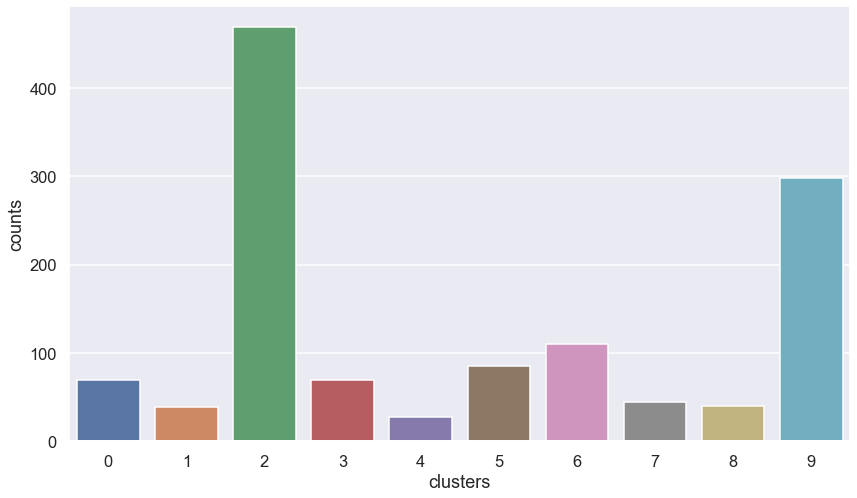

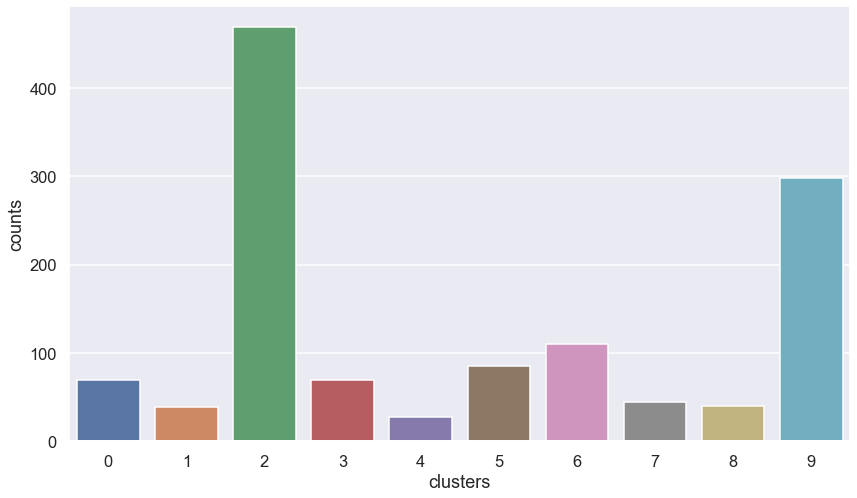

In [20]:
clusters, counts = np.unique(cluster_labels, return_counts=True)

clusters_df = pd.DataFrame()
clusters_df['clusters'] = clusters
clusters_df['counts'] = counts

sns.barplot(x='clusters', y='counts', data=clusters_df)

#### Mostrar instâncias de um cluster específico

In [21]:
show_cluster_data(df_copy, cluster_id=0, top_k=5)

,Title,Responsibilities
607,Business Intern 2018,"Responsibilities and detailed projects will be determined based on your educational background, interest and skills."
609,Business Intern 2018,"Responsibilities and detailed projects will be determined based on your educational background, interest and skills."
612,Business Intern 2018,"Responsibilities and detailed projects will be determined based on your educational background, interest and skills."
615,Business Intern 2018,"Responsibilities and detailed projects will be determined based on your educational background, interest and skills."
617,Business Intern 2018,"Responsibilities and detailed projects will be determined based on your educational background, interest and skills."


,Title,Responsibilities
607,Business Intern 2018,"Responsibilities and detailed projects will be determined based on your educational background, interest and skills."
609,Business Intern 2018,"Responsibilities and detailed projects will be determined based on your educational background, interest and skills."
612,Business Intern 2018,"Responsibilities and detailed projects will be determined based on your educational background, interest and skills."
615,Business Intern 2018,"Responsibilities and detailed projects will be determined based on your educational background, interest and skills."
617,Business Intern 2018,"Responsibilities and detailed projects will be determined based on your educational background, interest and skills."


In [22]:
show_cluster_data(df_copy, cluster_id=7, top_k=5)

,Title,Responsibilities
16,"Machine Learning Product Specialist, Google Cloud (EMEA)","Work as part of the Sales team to identify and qualify Platform opportunities and determine if Google Cloud Platform is right for them. Identify business and technical requirements, conduct full technical discovery and architect client solutions to meet gathered requirements.\nTake responsibility for leading the technical project, including such activities as technology advocacy, supporting bid responses, product and solution briefings, proof-of-concept work, and the coordination of supporti..."
25,"Partner Sales Engineer, Google Cloud","Work with Partner Managers to identify and recruit partners in the market that can deliver innovative solutions to our customers, built on top of Google Cloud (Google Cloud Platform and G Suite).\nDevelop our partners’ technical teams with both sales and technical competencies, so that they can be successful in the market.\nKeep partners up-to-date with product and technical knowledge and market differentiators.\nWork with partner technical representatives in opportunities and projects, comp..."
28,"Machine Learning Product Specialist, Google Cloud (EMEA)","Work as part of the Sales team to identify and qualify Platform opportunities and determine if Google Cloud Platform is right for them. Identify business and technical requirements, conduct full technical discovery and architect client solutions to meet gathered requirements.\nTake responsibility for leading the technical project, including such activities as technology advocacy, supporting bid responses, product and solution briefings, proof-of-concept work, and the coordination of supporti..."
35,"Big Data Product Specialist, Google Cloud (English)","Work as part of the Sales team to identify and qualify platform opportunities, and determine if Google Cloud Platform is right for them. Identify business and technical requirements, conduct full technical discovery and architect client solutions to meet gathered requirements.\nTake responsibility for leading technical projects, including such activities as technology advocacy, supporting bid responses, product and solution briefings, proof-of-concept work, and the coordination of supporting..."
38,"High Performance Computing (HPC) Specialist, Google Cloud","Work as part of the Sales team to identify and qualify platform opportunities. Identify business and technical requirements, conduct full technical discovery and architect client solutions to meet gathered requirements.\nLead technical projects including such activities as technology advocacy, supporting bid responses, product and solution briefings, proof-of-concept work and the coordination of supporting technical resources.\nWork hands-on with Google for Work Cloud Platform products to de..."


,Title,Responsibilities
16,"Machine Learning Product Specialist, Google Cloud (EMEA)","Work as part of the Sales team to identify and qualify Platform opportunities and determine if Google Cloud Platform is right for them. Identify business and technical requirements, conduct full technical discovery and architect client solutions to meet gathered requirements.\nTake responsibility for leading the technical project, including such activities as technology advocacy, supporting bid responses, product and solution briefings, proof-of-concept work, and the coordination of supporti..."
25,"Partner Sales Engineer, Google Cloud","Work with Partner Managers to identify and recruit partners in the market that can deliver innovative solutions to our customers, built on top of Google Cloud (Google Cloud Platform and G Suite).\nDevelop our partners’ technical teams with both sales and technical competencies, so that they can be successful in the market.\nKeep partners up-to-date with product and technical knowledge and market differentiators.\nWork with partner technical representatives in opportunities and projects, comp..."
28,"Machine Learning Product Specialist, Google Cloud (EMEA)","Work as part of the Sales team to identify and qualify Platform opportunities and determine if Google Cloud Platform is right for them. Identify business and technical requirements, conduct full technical discovery and architect client solutions to meet gathered requirements.\nTake responsibility for leading the technical project, including such activities as technology advocacy, supporting bid responses, product and solution briefings, proof-of-concept work, and the coordination of supporti..."
35,"Big Data Product Specialist, Google Cloud (English)","Work as part of the Sales team to identify and qualify platform opportunities, and determine if Google Cloud Platform is right for them. Identify business and technical requirements, conduct full technical discovery and architect client solutions to meet gathered requirements.\nTake responsibility for leading technical projects, including such activities as technology advocacy, supporting bid responses, product and solution briefings, proof-of-concept work, and the coordination of supporting..."
38,"High Performance Computing (HPC) Specialist, Google Cloud","Work as part of the Sales team to identify and qualify platform opportunities. Identify business and technical requirements, conduct full technical discovery and architect client solutions to meet gathered requirements.\nLead technical projects including such activities as technology advocacy, supporting bid responses, product and solution briefings, proof-of-concept work and the coordination of supporting technical resources.\nWork hands-on with Google for Work Cloud Platform products to de..."


#### Plotar títulos mais comuns de um cluster específico

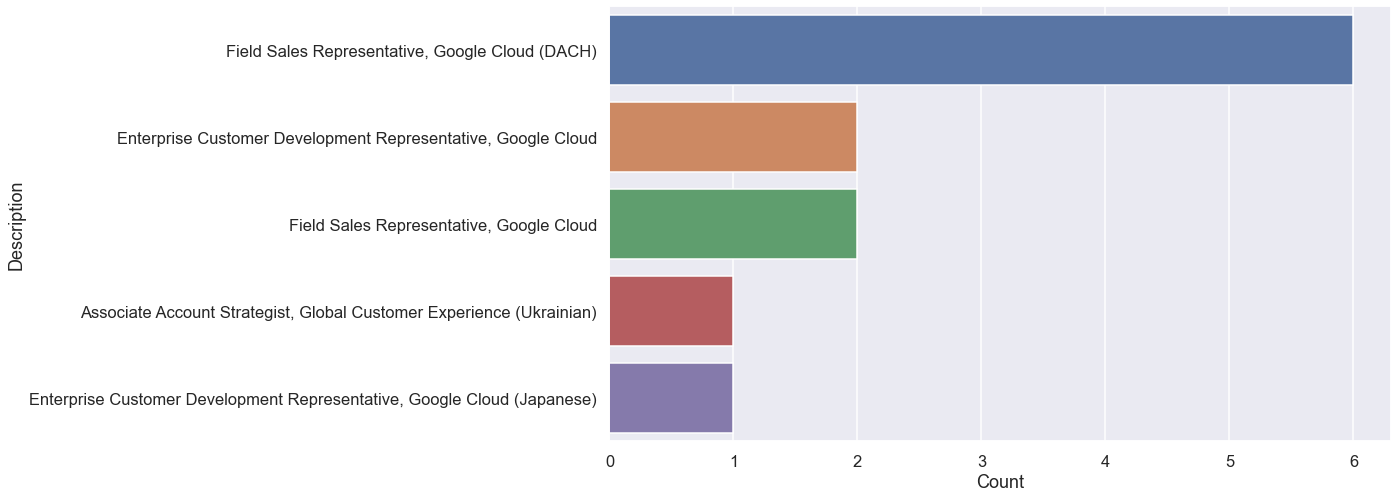

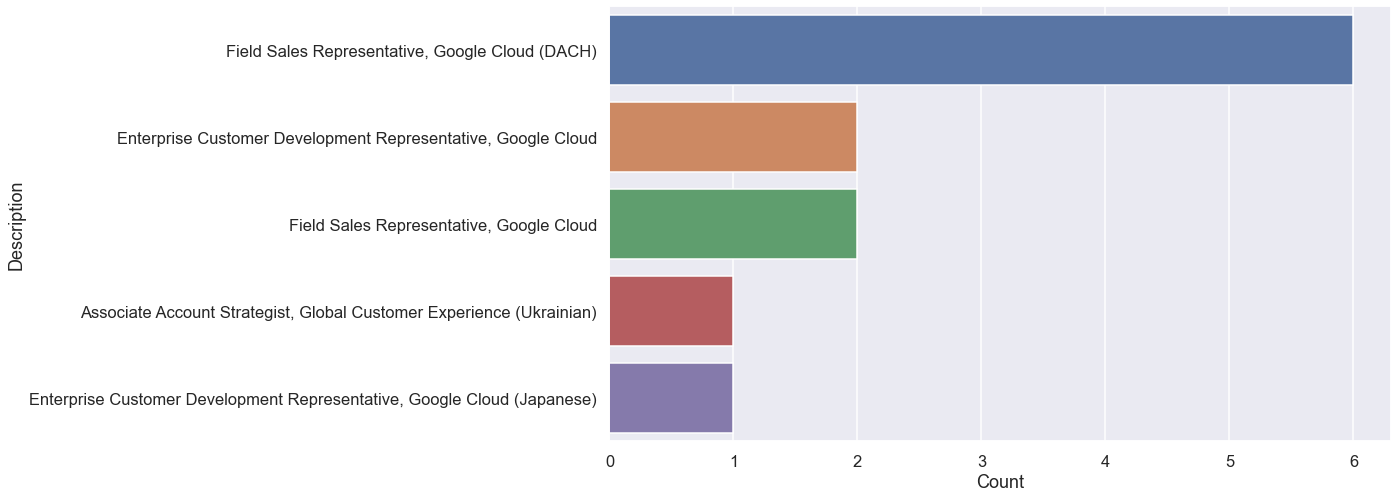

In [23]:
plot_titles_in_cluster(df_copy, cluster_id=1, top_k=5)

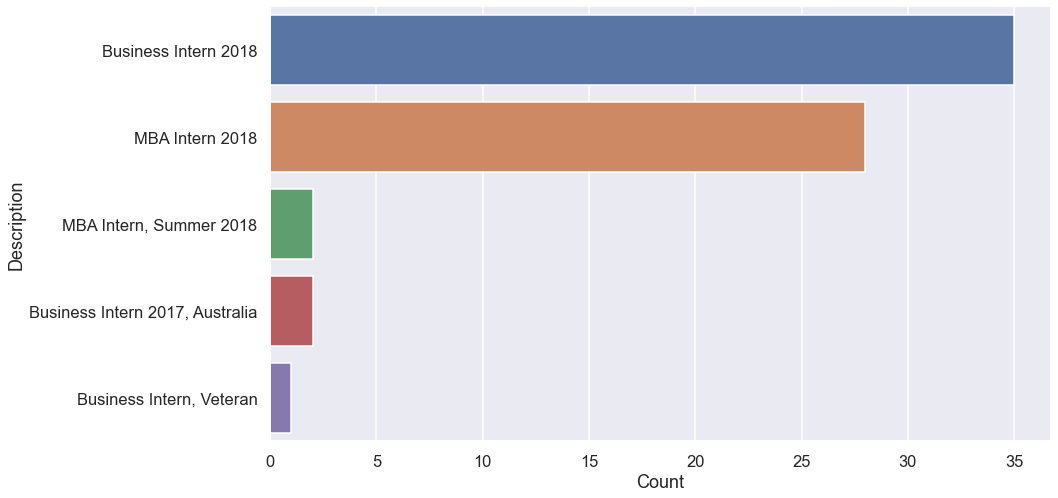

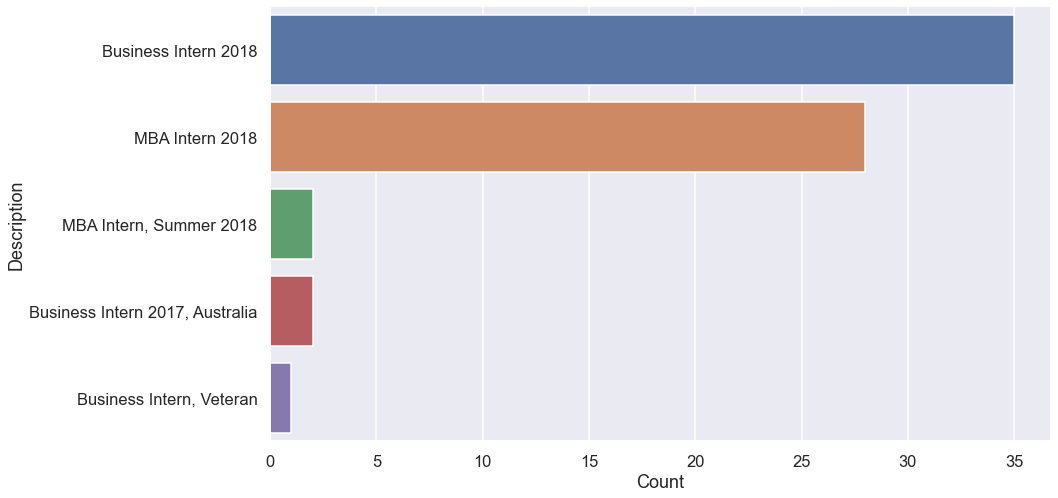

In [24]:
plot_titles_in_cluster(df_copy, cluster_id=0, top_k=5)

### Experimento 2

In [25]:
k = 30
start_time = time.time()
df_copy, cluster_labels = do_clustering(df, features.toarray(), k)
print(time.time() - start_time)
df_copy.head()

333.45544934272766
333.45544934272766


,Title,Category,Responsibilities,processed_responsibilities,cluster_labels
0,Google Cloud Program Manager,Program Management,"Shape, shepherd, ship, and show technical programs designed to support the work of Cloud Customer Engineers and Solutions Architects.\nMeasure and report on key metrics tied to those programs to identify any need to change course, cancel, or scale the programs from a regional to global platform.\nCommunicate status and identify any obstacles and paths for resolution to stakeholders, including those in senior roles, in a transparent, regular, professional and timely manner.\nEstablish expecta...",shape shepherd ship show technical programs designed support work cloud customer engineers solutions architects measure report key metrics tied programs identify need change course cancel scale programs regional global platform communicate status identify obstacles paths resolution stakeholders including senior roles transparent regular professional timely manner establish expectations rationale deliverables stakeholders program contributors provide program performance feedback teams product...,4
1,"Supplier Development Engineer (SDE), Cable/Connector",Manufacturing & Supply Chain,"Drive cross-functional activities in the supply chain for overall Technical Operational readiness in all NPI phases leading into mass production.\nCollaborate with suppliers and Engineering teams in assessing process technologies based on project requirements, and propose and develop the manufacturing blueprint including process flow, equipment/fixture designs, implementation schedules and validation plans for engineering builds and mass production.\nDrive project technical and operational i...",drive cross functional activities supply chain overall technical operational readiness npi phases leading mass production collaborate suppliers engineering teams assessing process technologies based project requirements propose develop manufacturing blueprint including process flow equipment fixture designs implementation schedules validation plans engineering builds mass production drive project technical operational issues material process fixtures equipment etc npi phase enable delivery m...,5
2,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"Collect and analyze data to draw insight and identify strategic solutions.\nBuild consensus by facilitating broad collaboration with clear communication and documentation.\nWork with cross-functional stakeholders to gather requirements, manage implementation, and drive delivery of projects.",collect analyze data draw insight identify strategic solutions build consensus facilitating broad collaboration clear communication documentation work cross functional stakeholders gather requirements manage implementation drive delivery projects,4
3,"Developer Advocate, Partner Engineering",Developer Relations,"Work one-on-one with the top Android, iOS, and web engineers to build exciting new product/API integrations that drive adoption of Google’s developer platforms.\nConceive new features and ideas that can change how users interact with apps and Google, and help developers build them.\nConduct regular, engineering-focused meetings with developers to help them design new systems, fix bugs, improve UX, and solve complex code issues.\nWork on the source code of Google's products with other enginee...",work one on one top android ios web engineers build exciting new product api integrations drive adoption google’s developer platforms conceive new features ideas change users interact apps google help developers build them conduct regular engineering focused meetings developers help design new systems fix bugs improve ux solve complex code issues work source code google s products engineers identify reproduce and or fix bugs affecting developers,6
4,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Plan requirements with internal customers.\nProvide por

,Title,Category,Responsibilities,processed_responsibilities,cluster_labels
0,Google Cloud Program Manager,Program Management,"Shape, shepherd, ship, and show technical programs designed to support the work of Cloud Customer Engineers and Solutions Architects.\nMeasure and report on key metrics tied to those programs to identify any need to change course, cancel, or scale the programs from a regional to global platform.\nCommunicate status and identify any obstacles and paths for resolution to stakeholders, including those in senior roles, in a transparent, regular, professional and timely manner.\nEstablish expecta...",shape shepherd ship show technical programs designed support work cloud customer engineers solutions architects measure report key metrics tied programs identify need change course cancel scale programs regional global platform communicate status identify obstacles paths resolution stakeholders including senior roles transparent regular professional timely manner establish expectations rationale deliverables stakeholders program contributors provide program performance feedback teams product...,4
1,"Supplier Development Engineer (SDE), Cable/Connector",Manufacturing & Supply Chain,"Drive cross-functional activities in the supply chain for overall Technical Operational readiness in all NPI phases leading into mass production.\nCollaborate with suppliers and Engineering teams in assessing process technologies based on project requirements, and propose and develop the manufacturing blueprint including process flow, equipment/fixture designs, implementation schedules and validation plans for engineering builds and mass production.\nDrive project technical and operational i...",drive cross functional activities supply chain overall technical operational readiness npi phases leading mass production collaborate suppliers engineering teams assessing process technologies based project requirements propose develop manufacturing blueprint including process flow equipment fixture designs implementation schedules validation plans engineering builds mass production drive project technical operational issues material process fixtures equipment etc npi phase enable delivery m...,5
2,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"Collect and analyze data to draw insight and identify strategic solutions.\nBuild consensus by facilitating broad collaboration with clear communication and documentation.\nWork with cross-functional stakeholders to gather requirements, manage implementation, and drive delivery of projects.",collect analyze data draw insight identify strategic solutions build consensus facilitating broad collaboration clear communication documentation work cross functional stakeholders gather requirements manage implementation drive delivery projects,4
3,"Developer Advocate, Partner Engineering",Developer Relations,"Work one-on-one with the top Android, iOS, and web engineers to build exciting new product/API integrations that drive adoption of Google’s developer platforms.\nConceive new features and ideas that can change how users interact with apps and Google, and help developers build them.\nConduct regular, engineering-focused meetings with developers to help them design new systems, fix bugs, improve UX, and solve complex code issues.\nWork on the source code of Google's products with other enginee...",work one on one top android ios web engineers build exciting new product api integrations drive adoption google’s developer platforms conceive new features ideas change users interact apps google help developers build them conduct regular engineering focused meetings developers help design new systems fix bugs improve ux solve complex code issues work source code google s products engineers identify reproduce and or fix bugs affecting developers,6
4,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Plan requirements with internal customers.\nProvide por

### Inspecionando clusters

#### Quantidade de instâncias por cluster

<AxesSubplot:xlabel='clusters', ylabel='counts'>

<AxesSubplot:xlabel='clusters', ylabel='counts'>

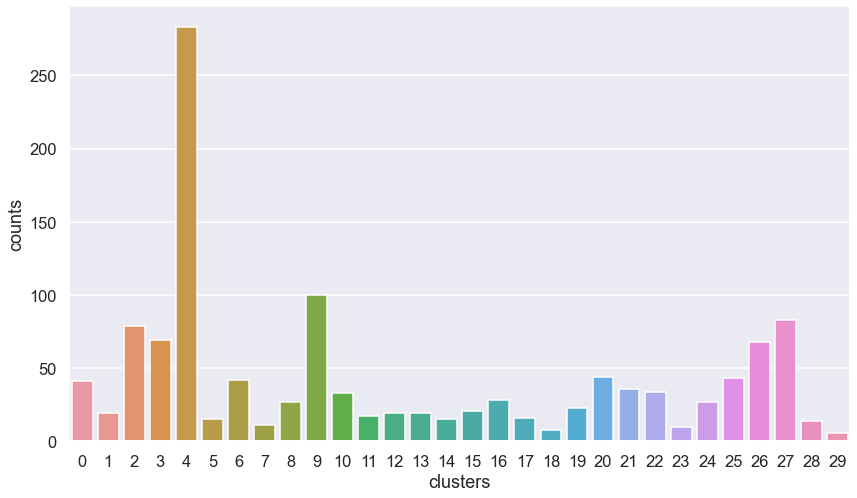

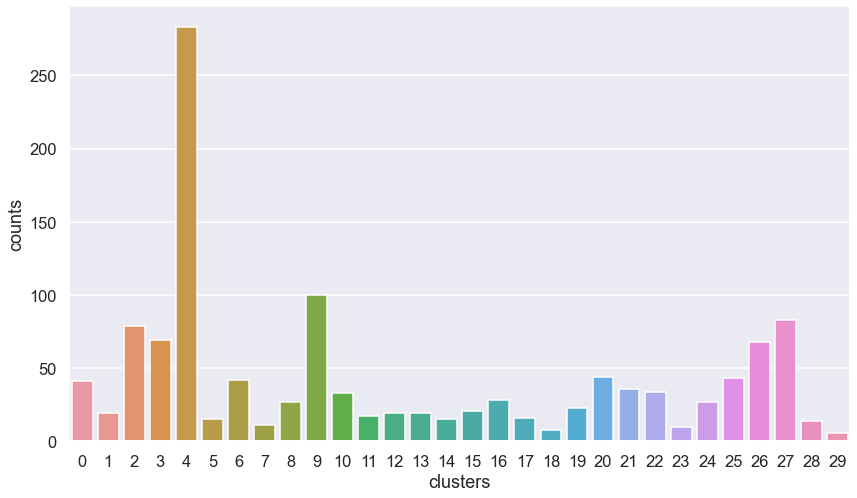

In [26]:
clusters, counts = np.unique(cluster_labels, return_counts=True)

clusters_df = pd.DataFrame()
clusters_df['clusters'] = clusters
clusters_df['counts'] = counts

sns.barplot(x='clusters', y='counts', data=clusters_df)

#### Mostrar instâncias de um cluster específico

In [27]:
show_cluster_data(df_copy, cluster_id=1, top_k=5)

,Title,Responsibilities
313,"Field Sales Representative, Google Cloud (DACH)","Engage with prospect organizations to position Google Cloud Platform solutions through strategic value based solution proposals, references and analyst data.\nWork with wider Google AdWords and Google Cloud account teams to develop and drive pipeline, and provide guidance. Work with Google Cloud Platform partners to develop campaigns.\nServe as the primary customer contact during bid submission, pilot test, legal review and procurement. Keep records of customer interactions and provide quart..."
368,"Field Sales Representative, Google Cloud (DACH)","Engage with prospect organizations to position Google Cloud Platform solutions through strategic value based solution proposals, references and analyst data.\nWork with wider Google AdWords and Google Cloud account teams to develop and drive pipeline, and provide guidance. Work with Google Cloud Platform partners to develop campaigns.\nServe as the primary customer contact during bid submission, pilot test, legal review and procurement. Keep records of customer interactions and provide quart..."
410,"Field Sales Representative, Google Cloud (DACH)","Engage with prospect organizations to position Google Cloud Platform solutions through strategic value based solution proposals, references and analyst data.\nWork with wider Google AdWords and Google Cloud account teams to develop and drive pipeline, and provide guidance. Work with Google Cloud Platform partners to develop campaigns.\nServe as the primary customer contact during bid submission, pilot test, legal review and procurement. Keep records of customer interactions and provide quart..."
425,"Field Sales Representative, Google Cloud","Engage with prospect organizations to position Google Cloud Platform solutions through strategic value based solution proposals, references and analyst data.\nWork with wider Google AdWords and Google Cloud account teams to develop and drive pipeline, providing additional guidance. Work with Google Cloud Platform partners to develop campaigns.\nServe as the primary customer contact during bid submission, pilot test, legal review and procurement. Keep records of customer interactions and prov..."
429,"Field Sales Representative, Google Cloud (DACH)","Engage with prospect organizations to position Google Cloud Platform solutions through strategic value based solution proposals, references and analyst data.\nWork with wider Google AdWords and Google Cloud account teams to develop and drive pipeline, and provide guidance. Work with Google Cloud Platform partners to develop campaigns.\nServe as the primary customer contact during bid submission, pilot test, legal review and procurement. Keep records of customer interactions and provide quart..."


,Title,Responsibilities
313,"Field Sales Representative, Google Cloud (DACH)","Engage with prospect organizations to position Google Cloud Platform solutions through strategic value based solution proposals, references and analyst data.\nWork with wider Google AdWords and Google Cloud account teams to develop and drive pipeline, and provide guidance. Work with Google Cloud Platform partners to develop campaigns.\nServe as the primary customer contact during bid submission, pilot test, legal review and procurement. Keep records of customer interactions and provide quart..."
368,"Field Sales Representative, Google Cloud (DACH)","Engage with prospect organizations to position Google Cloud Platform solutions through strategic value based solution proposals, references and analyst data.\nWork with wider Google AdWords and Google Cloud account teams to develop and drive pipeline, and provide guidance. Work with Google Cloud Platform partners to develop campaigns.\nServe as the primary customer contact during bid submission, pilot test, legal review and procurement. Keep records of customer interactions and provide quart..."
410,"Field Sales Representative, Google Cloud (DACH)","Engage with prospect organizations to position Google Cloud Platform solutions through strategic value based solution proposals, references and analyst data.\nWork with wider Google AdWords and Google Cloud account teams to develop and drive pipeline, and provide guidance. Work with Google Cloud Platform partners to develop campaigns.\nServe as the primary customer contact during bid submission, pilot test, legal review and procurement. Keep records of customer interactions and provide quart..."
425,"Field Sales Representative, Google Cloud","Engage with prospect organizations to position Google Cloud Platform solutions through strategic value based solution proposals, references and analyst data.\nWork with wider Google AdWords and Google Cloud account teams to develop and drive pipeline, providing additional guidance. Work with Google Cloud Platform partners to develop campaigns.\nServe as the primary customer contact during bid submission, pilot test, legal review and procurement. Keep records of customer interactions and prov..."
429,"Field Sales Representative, Google Cloud (DACH)","Engage with prospect organizations to position Google Cloud Platform solutions through strategic value based solution proposals, references and analyst data.\nWork with wider Google AdWords and Google Cloud account teams to develop and drive pipeline, and provide guidance. Work with Google Cloud Platform partners to develop campaigns.\nServe as the primary customer contact during bid submission, pilot test, legal review and procurement. Keep records of customer interactions and provide quart..."


#### Plotar títulos mais comuns de um cluster específico

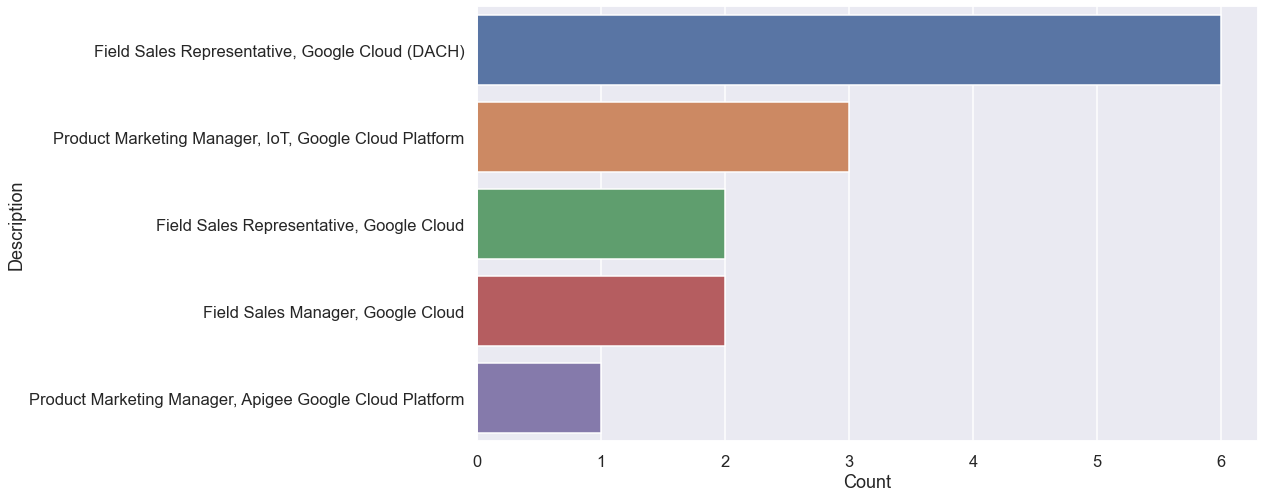

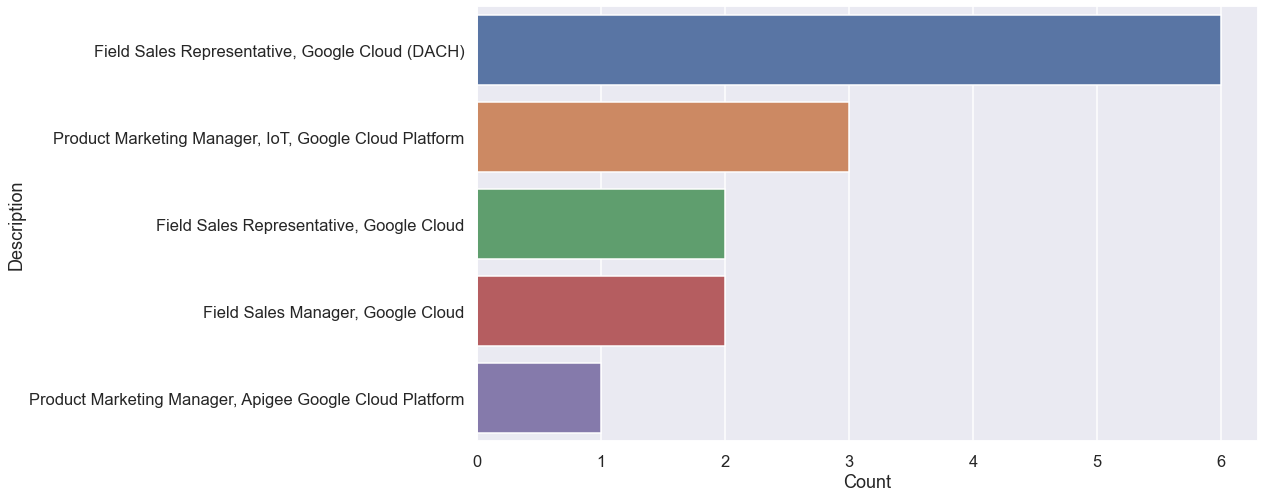

In [28]:
plot_titles_in_cluster(df_copy, cluster_id=1, top_k=5)

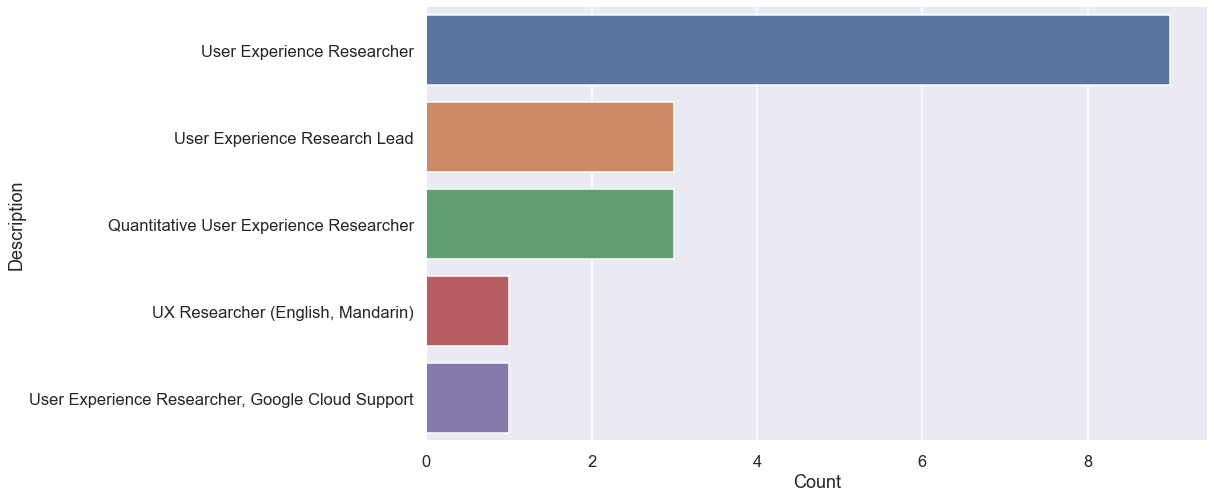

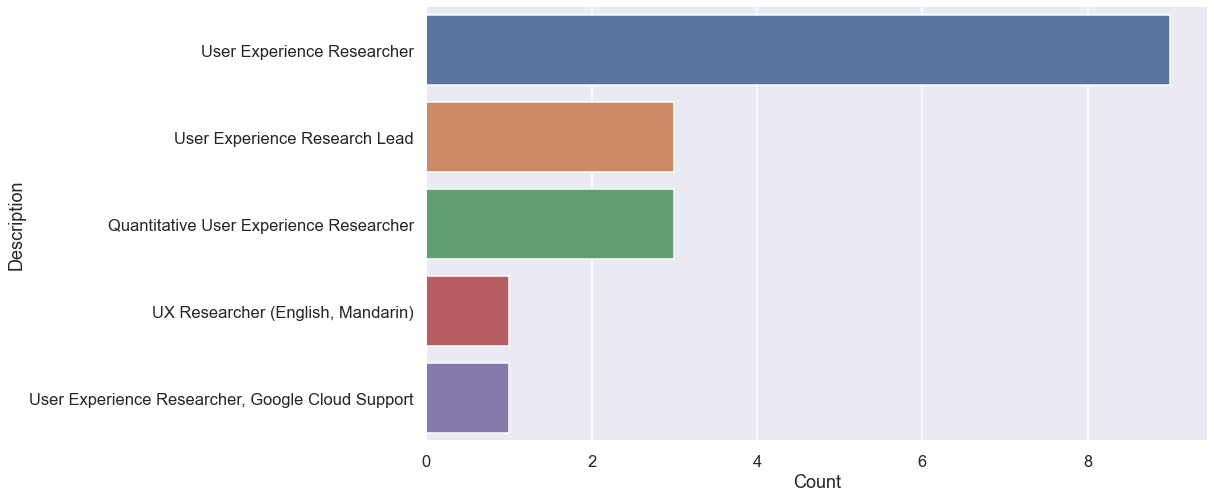

In [29]:
plot_titles_in_cluster(df_copy, cluster_id=11, top_k=5)

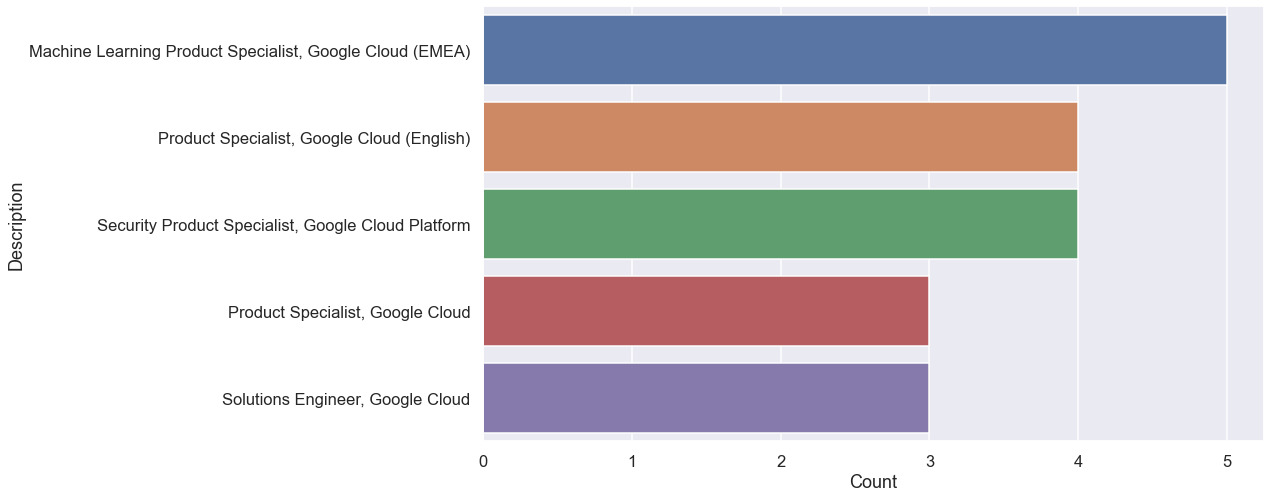

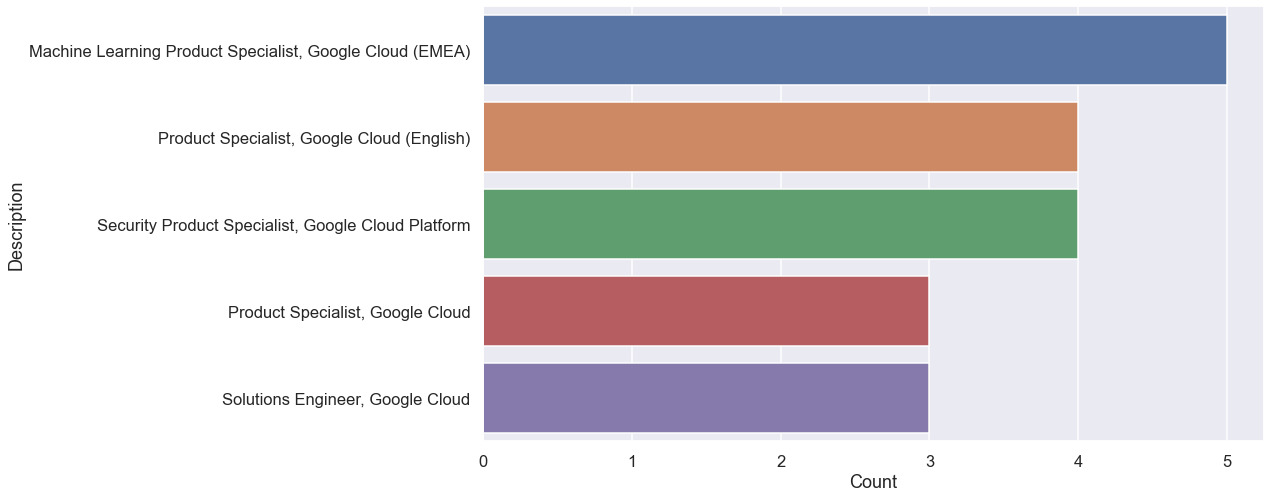

In [30]:
plot_titles_in_cluster(df_copy, cluster_id=22, top_k=5)

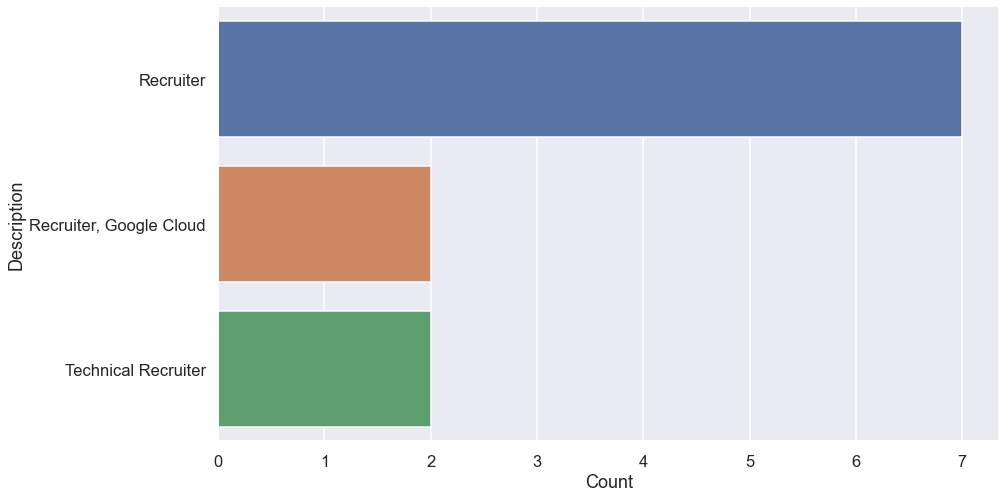

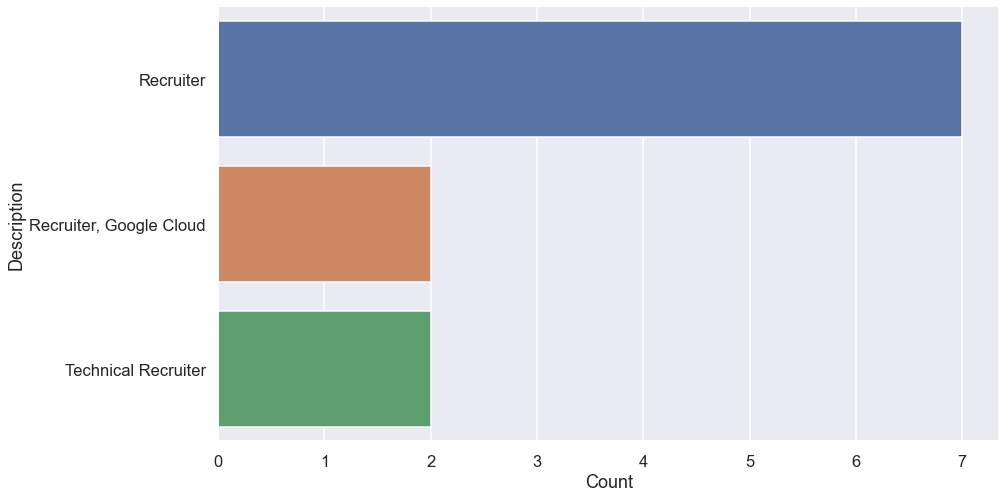

In [31]:
plot_titles_in_cluster(df_copy, cluster_id=7, top_k=3)